In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import cv2
import random
import os
import imageio.v2 as imageio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from collections import Counter
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, RepeatedStratifiedKFold

import tensorflow as tf
import keras
from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.applications.resnet import ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array, array_to_img, plot_model
from tensorflow.keras.models import load_model
from keras.callbacks import EarlyStopping

import warnings
warnings.simplefilter("ignore", UserWarning)

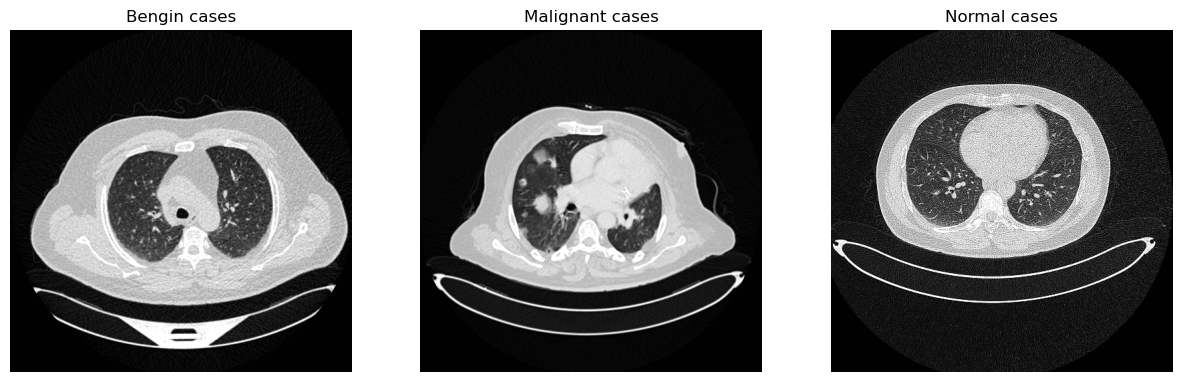

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

directory = 'Data/Train'
categories = ['Bengin cases', 'Malignant cases', 'Normal cases']

fig, axes = plt.subplots(1, len(categories), figsize=(15, 5))

for i, category in enumerate(categories):
    path = os.path.join(directory, category)
    class_num = categories.index(category)
    
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        axes[i].imshow(img, cmap='gray')  
        axes[i].set_title(category)
        axes[i].axis('off')  

plt.show()


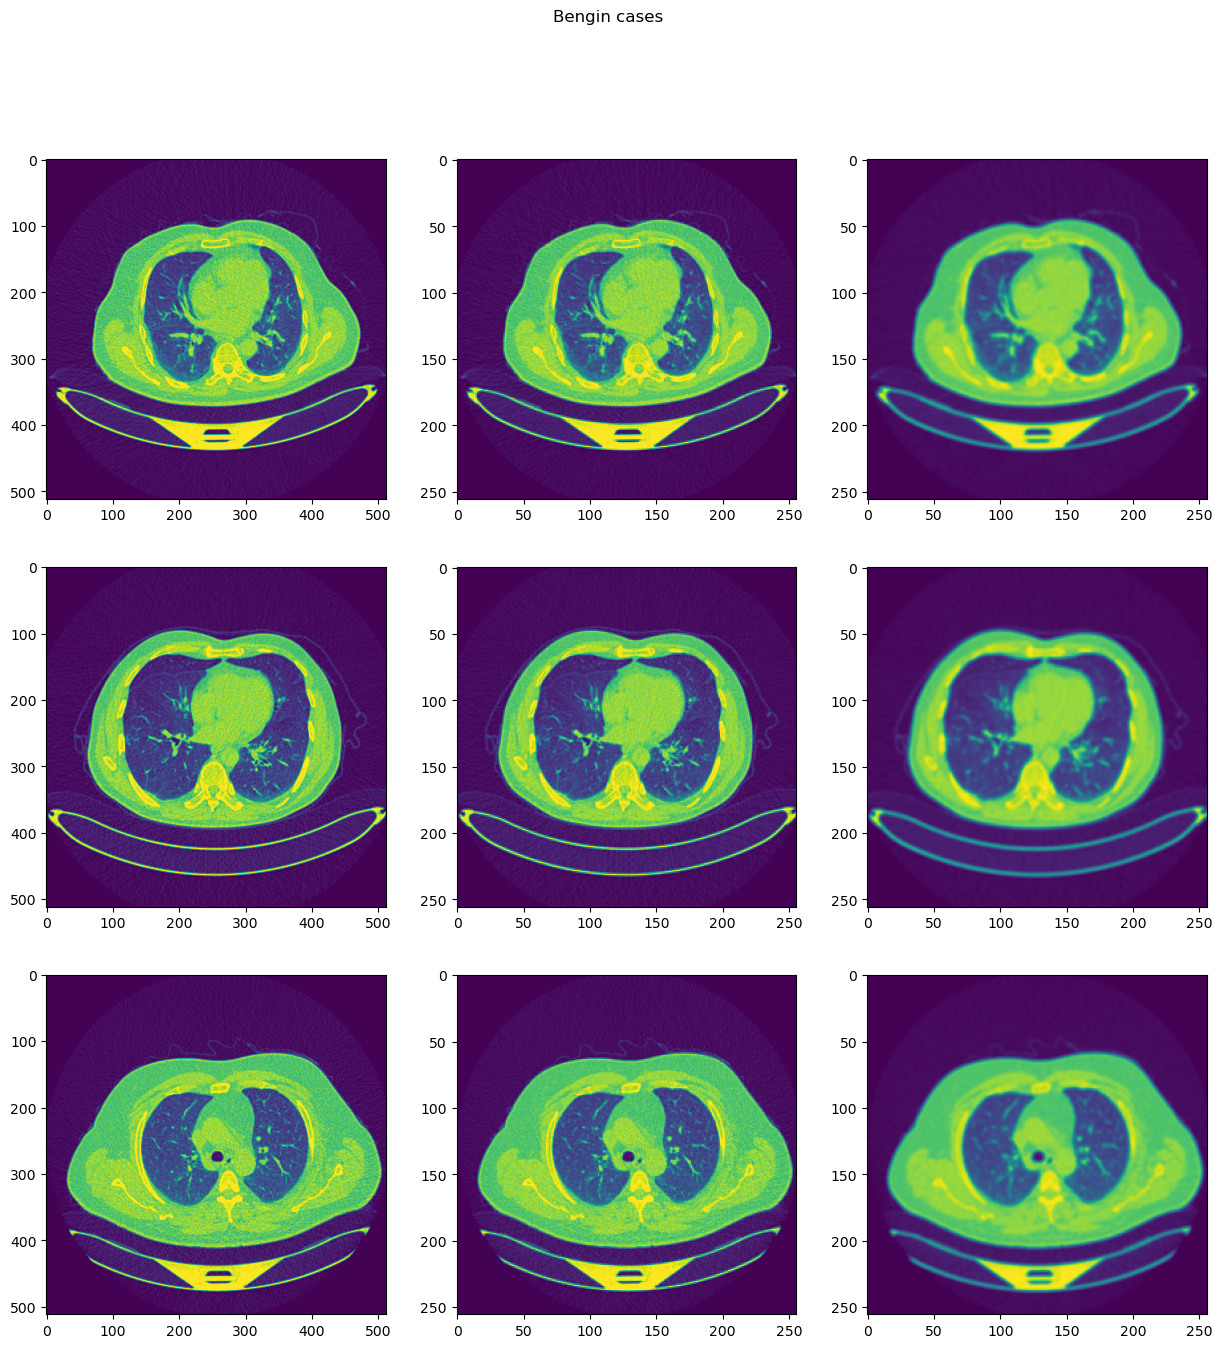

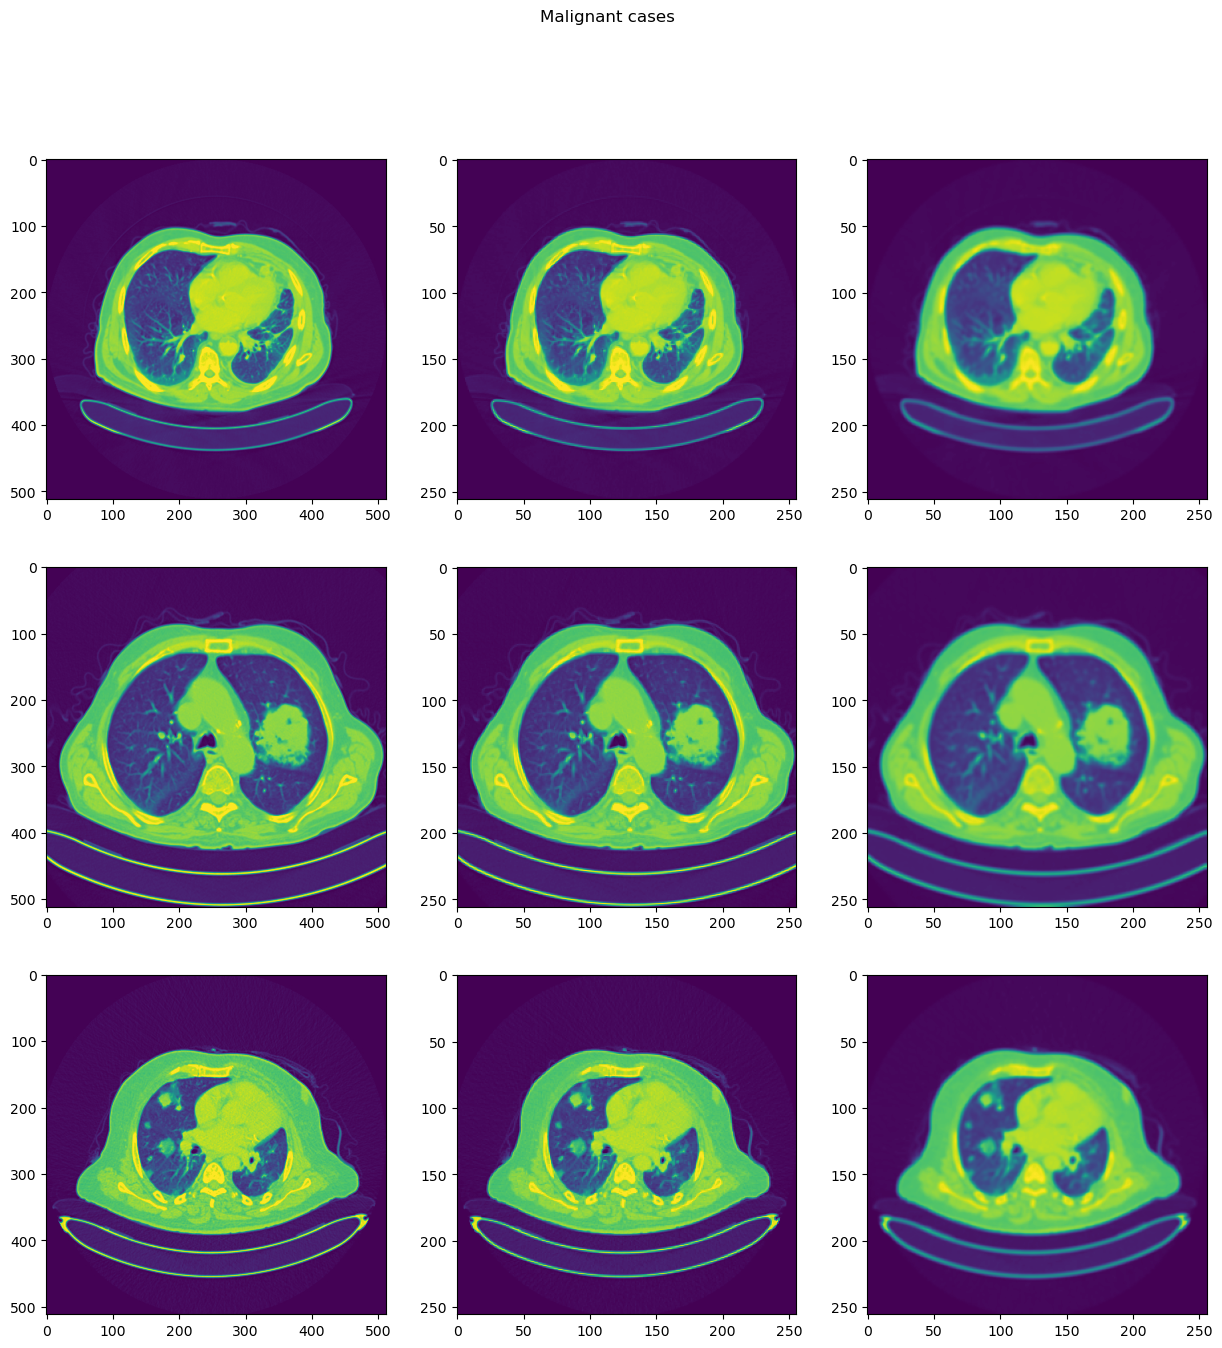

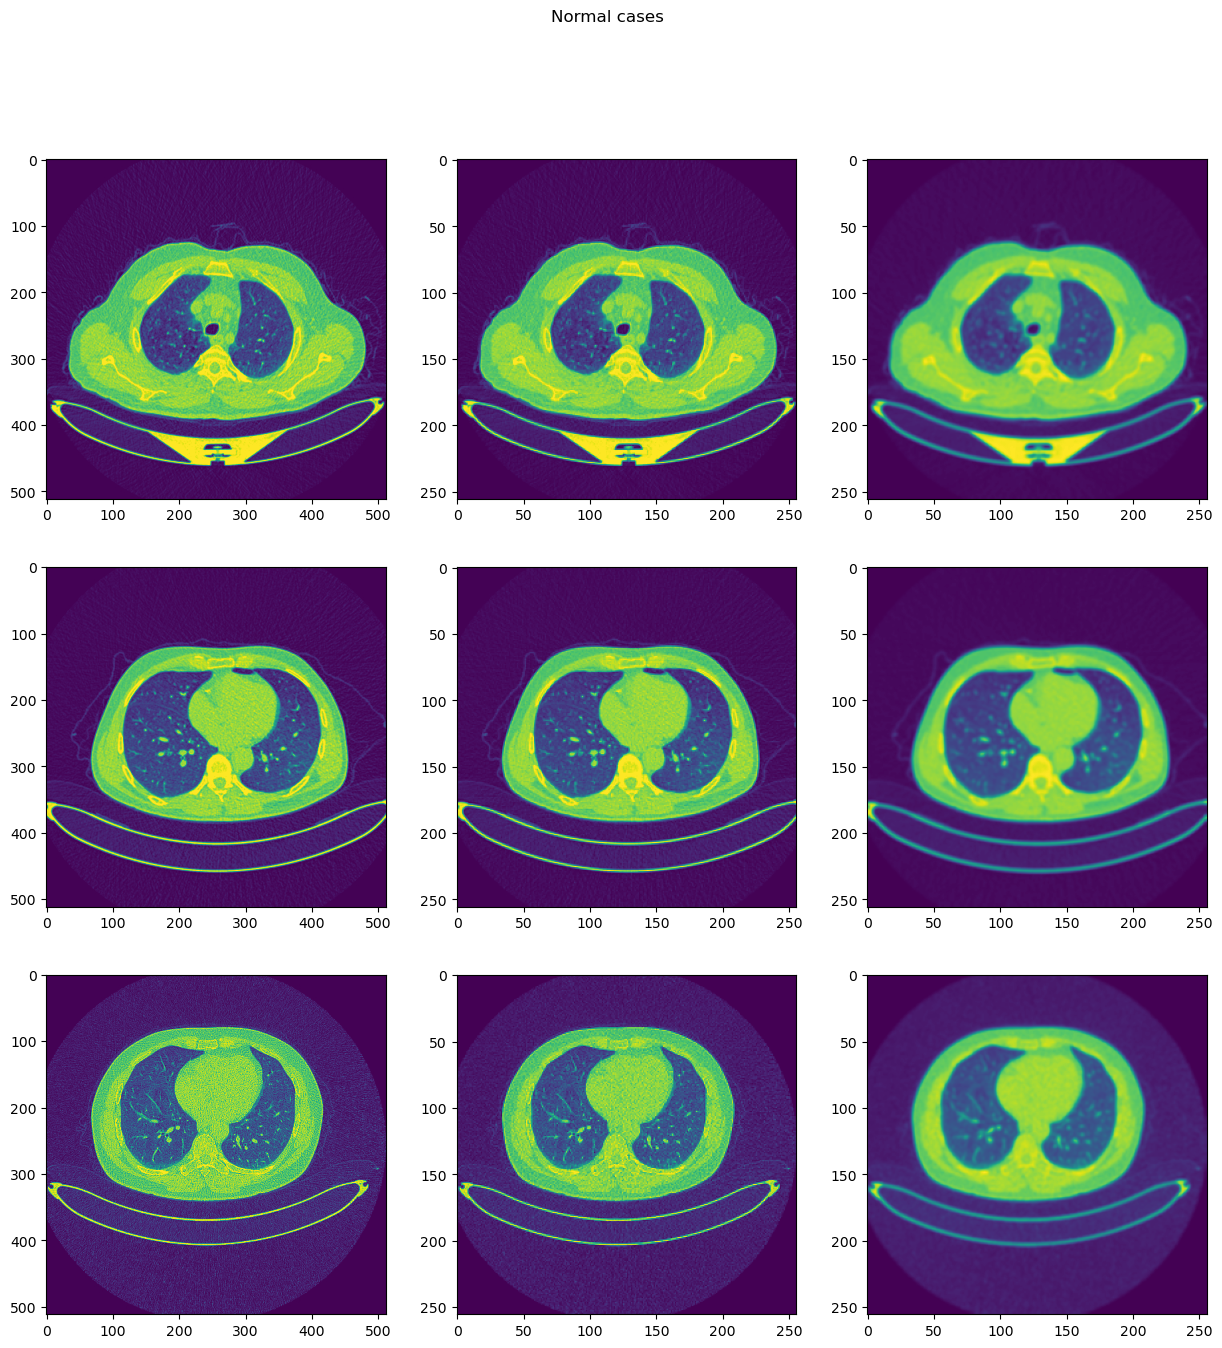

In [35]:
img_size = 256
for i in categories:
    cnt, samples = 0, 3
    fig, ax = plt.subplots(samples, 3, figsize=(15, 15))
    fig.suptitle(i)
    
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for curr_cnt, file in enumerate(os.listdir(path)):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        
        img0 = cv2.resize(img, (img_size, img_size))
        
        img1 = cv2.GaussianBlur(img0, (5, 5), 0)
        
        ax[cnt, 0].imshow(img)
        ax[cnt, 1].imshow(img0)
        ax[cnt, 2].imshow(img1)
        cnt += 1
        if cnt == samples:
            break
        
plt.show()

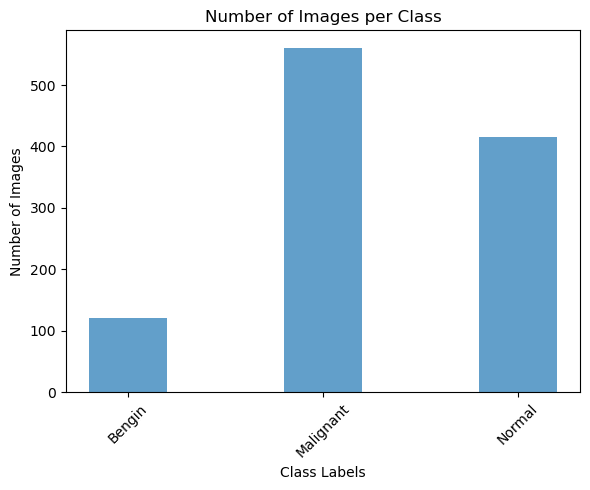

In [60]:
import os
import matplotlib.pyplot as plt

# Define the path dataset directory
dataset_dir = 'Data/Train'

# Define the class labels and their corresponding subdirectories
class_labels = ['bengin cases', 'malignant cases', 'normal cases']  # Replace with your class labels

# Define the new class labels for visualization
new_class_labels = ['Bengin', 'Malignant', 'Normal']  # Replace with the new class labels you want

# Create lists to store the counts
class_counts = []

# Calculate the counts for each class
for class_label in class_labels:
    class_count = len(os.listdir(os.path.join(dataset_dir, class_label)))
    class_counts.append(class_count)

# Create a bar chart to visualize the counts with the new labels
plt.figure(figsize=(6, 5))
bar_width = 0.4
index = range(len(new_class_labels))

plt.bar(index, class_counts, bar_width, align='center', alpha=0.7)

plt.xlabel('Class Labels')
plt.ylabel('Number of Images')
plt.title('Number of Images per Class')
plt.xticks(index, new_class_labels, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [37]:
data = []
img_size = 256

for i in categories:
    path = os.path.join(directory, i)
    class_num = categories.index(i)
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        img = cv2.imread(filepath, 0)
        # preprocess here
        img = cv2.resize(img, (img_size, img_size))
        data.append([img, class_num])
        
random.shuffle(data)

X, y = [], []
for feature, label in data:
    X.append(feature)
    y.append(label)
    
print('X length:', len(X))
print('y counts:', Counter(y))

# normalize
X = np.array(X).reshape(-1, img_size, img_size, 1)
X = X / 255.0
y = np.array(y)

X length: 1097
y counts: Counter({1: 561, 2: 416, 0: 120})


In [38]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train length:', len(X_train), X_train.shape)
print('Test length:', len(X_valid), X_valid.shape)

Train length: 877 (877, 256, 256, 1)
Test length: 220 (220, 256, 256, 1)


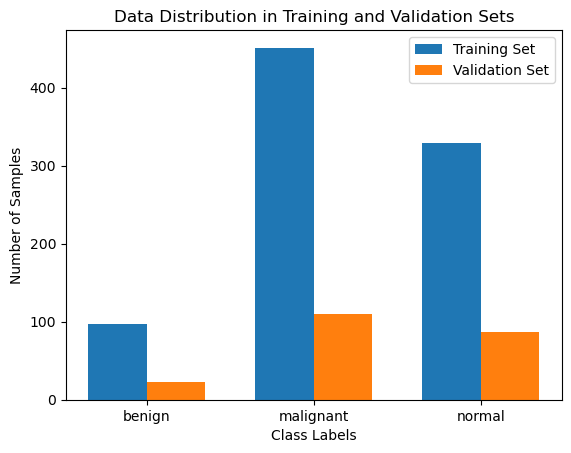

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the counts for each class in the training and validation sets
train_class_counts = [np.sum(y_train == label) for label in np.unique(y_train)]
valid_class_counts = [np.sum(y_valid == label) for label in np.unique(y_valid)]

# Define class labels
class_labels = ['benign', 'malignant', 'normal']

# Create an array of class indices
class_indices = np.arange(len(class_labels))

# Set the width of the bars
bar_width = 0.35

# Create subplots for the training and validation sets
fig, ax = plt.subplots()
train_bars = ax.bar(class_indices - bar_width/2, train_class_counts, bar_width, label='Training Set')
valid_bars = ax.bar(class_indices + bar_width/2, valid_class_counts, bar_width, label='Validation Set')

# Set labels, title, and legend
ax.set_xlabel('Class Labels')
ax.set_ylabel('Number of Samples')
ax.set_title('Data Distribution in Training and Validation Sets')
ax.set_xticks(class_indices)
ax.set_xticklabels(class_labels)
ax.legend()

# Show the plot
plt.show()


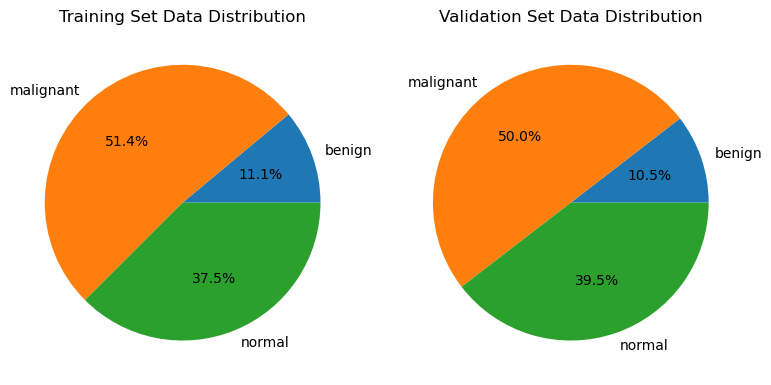

In [64]:
import matplotlib.pyplot as plt

# Calculate the counts for each class in the training and validation sets
train_class_counts = [np.sum(y_train == label) for label in np.unique(y_train)]
valid_class_counts = [np.sum(y_valid == label) for label in np.unique(y_valid)]

# Define class labels 
class_labels = ['benign', 'malignant', 'normal']

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(8, 6))

# Create a pie chart for the training set on the left subplot
axes[0].pie(train_class_counts, labels=class_labels, autopct='%1.1f%%')
axes[0].set_title('Training Set Data Distribution')

# Create a pie chart for the validation set on the right subplot
axes[1].pie(valid_class_counts, labels=class_labels, autopct='%1.1f%%')
axes[1].set_title('Validation Set Data Distribution')

# Adjust spacing between subplots
plt.tight_layout()

# Show the figure with both pie charts
plt.show()


In [39]:
print(len(X_train), X_train.shape)

X_train = X_train.reshape(X_train.shape[0], img_size*img_size*1)

print(len(X_train), X_train.shape)

877 (877, 256, 256, 1)
877 (877, 65536)


In [40]:
from sklearn.model_selection import train_test_split
from collections import Counter

# Randomly sample from the training data to create X_train_sampled and y_train_sampled
sample_size = min(Counter(y_train).values())
X_train_sampled = []
y_train_sampled = []
for class_label in np.unique(y_train):
    mask = (y_train == class_label)
    X_class = X_train[mask]
    y_class = y_train[mask]
    
    if len(X_class) < sample_size:
        # Handle the case where there are not enough samples in this class
        indices = np.random.choice(len(X_class), sample_size, replace=True)
    else:
        indices = np.random.choice(len(X_class), sample_size, replace=False)
    
    X_train_sampled.extend(X_class[indices])
    y_train_sampled.extend(y_class[indices])

X_train_sampled = np.array(X_train_sampled)
y_train_sampled = np.array(y_train_sampled)

# Check the class distribution after sampling
print('After Sampling:', Counter(y_train_sampled))


After Sampling: Counter({0: 97, 1: 97, 2: 97})


In [41]:
X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_train_sampled = X_train_sampled.reshape(X_train_sampled.shape[0], img_size, img_size, 1)

print(len(X_train), X_train.shape)
print(len(X_train_sampled), X_train_sampled.shape)

877 (877, 256, 256, 1)
291 (291, 256, 256, 1)


In [42]:
train_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [43]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=8, shuffle=True)
validation_generator = val_datagen.flow(X_valid, y_valid, batch_size=8, shuffle=True)

In [44]:
# Load the pre-trained ResNet50 model without the top classification layer
resnet_base = ResNet50(weights=None, include_top=False, input_shape=X_train.shape[1:])

# Freeze the pre-trained layers so they are not updated during training
for layer in resnet_base.layers:
    layer.trainable = False

# Create a new model
model = Sequential()

# Add the ResNet50 base model
model.add(resnet_base)

# Added custom classification layers on top
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Print the summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23581440  
                                                                 
 flatten_1 (Flatten)         (None, 131072)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               16777344  
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                                 
Total params: 40,359,171
Trainable params: 16,777,731
Non-trainable params: 23,581,440
_________________________________________________________________


In [45]:
callback = EarlyStopping(monitor='val_loss', patience=3)

In [46]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[callback])

Epoch 1/20
110/110 [==============================] - 93s 817ms/step - loss: 0.9247 - accuracy: 0.6055 - val_loss: 0.6861 - val_accuracy: 0.7136
Epoch 2/20
110/110 [==============================] - 88s 798ms/step - loss: 0.6440 - accuracy: 0.7412 - val_loss: 0.5728 - val_accuracy: 0.7909
Epoch 3/20
110/110 [==============================] - 86s 781ms/step - loss: 0.4833 - accuracy: 0.8187 - val_loss: 0.4291 - val_accuracy: 0.8182
Epoch 4/20
110/110 [==============================] - 85s 778ms/step - loss: 0.3477 - accuracy: 0.8928 - val_loss: 0.3250 - val_accuracy: 0.9000
Epoch 5/20
110/110 [==============================] - 86s 785ms/step - loss: 0.2544 - accuracy: 0.9396 - val_loss: 0.4160 - val_accuracy: 0.7955
Epoch 6/20
110/110 [==============================] - 86s 781ms/step - loss: 0.1988 - accuracy: 0.9475 - val_loss: 0.2155 - val_accuracy: 0.9500
Epoch 7/20
110/110 [==============================] - 90s 820ms/step - loss: 0.2026 - accuracy: 0.9453 - val_loss: 0.1513 - val_ac

In [78]:
final_accuracy = str(history.history['accuracy'][-1])[:6]
final_loss = str(history.history['loss'][-1])[:6]

print("Training Accuracy:", final_accuracy)
print("Testing Loss:", final_loss)


Training Accuracy: 0.9988
Testing Loss: 0.0141


In [48]:
model.save('Best_model_new.h5')

In [49]:
model = tf.keras.models.load_model('Best_model_new.h5')

In [50]:
y_pred = model.predict(X_valid, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)

# Get the loss and accuracy from model evaluation
loss, accuracy = model.evaluate(X_valid, y_valid)

print("Evaluation Metrics:")
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Print the classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_valid, y_pred_bool))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_true=y_valid, y_pred=y_pred_bool))


7/7 [==============================] - 26s 3s/step - loss: 0.0452 - accuracy: 0.9909
Evaluation Metrics:
Test Loss: 0.04516227915883064
Test Accuracy: 0.9909090995788574
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.91      0.95        23
           1       1.00      1.00      1.00       110
           2       0.98      1.00      0.99        87

    accuracy                           0.99       220
   macro avg       0.99      0.97      0.98       220
weighted avg       0.99      0.99      0.99       220

Confusion Matrix:
[[ 21   0   2]
 [  0 110   0]
 [  0   0  87]]


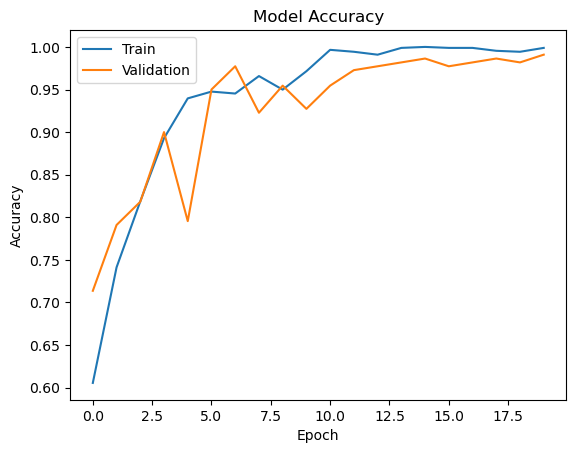

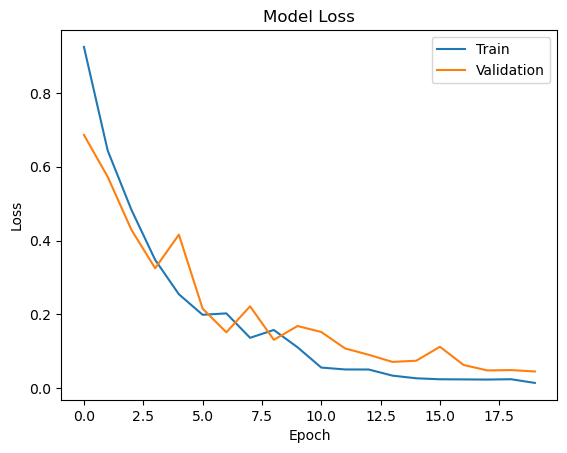

In [51]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

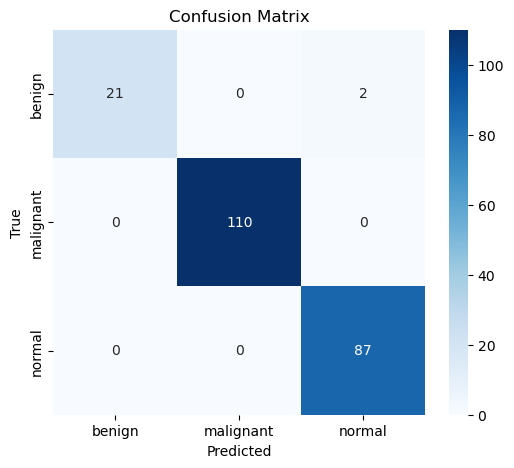

In [66]:
def plot_confusion_matrix(y_valid, y_pred, class_labels):
    cm = confusion_matrix(y_valid, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(y_valid, y_pred_bool, class_labels)


In [55]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

# Load trained model
model = load_model('Best_model.h5')

# Define the image file path want to predict
image_path = 'unwanted/Lung_cancer_dataset/Test/Malignant cases/Malignant case (547).jpg'

# Load and preprocess the image
img = image.load_img(image_path, target_size=(256, 256), color_mode='grayscale')  # Set the target size and color mode
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)  # Add an extra dimension to match the model's input shape
img = img / 255.0  # Normalize the pixel values (if training data was normalized)

# Make the prediction
prediction = model.predict(img)

# Decode the prediction
class_labels = ['benign', 'malignant', 'normal']
predicted_class = class_labels[np.argmax(prediction)]

print(f'The image is classified as: {predicted_class}')


1/1 [==============================] - 1s 1s/step
The image is classified as: malignant
